# Objective

Determine the good measurement for flow cell "dirtiness" (i.e., how badly the background is contaminated by those small bright specks that build up).

# Contents

This notebook shows each image and six different possible metrics for the dirtiness of that image. The six metrics shown here are the following:
- `image_name`: summing the image without filtering
- `sum_filtered1`: summing the image with a bandpass filter to enhance the speckles
- `sum_filtered2`: summing the image with two bandpass filters to remove the "ghosts"
- `sum_filtered2`: summing the binarized image without filtering
- `sum_filtered2`: summing the binarized image with a bandpass filter to enhance the speckles
- `sum_bin_filtered2`: summing the binarized image with two bandpass filters to remove the "ghosts"

At the bottom of the notebook is a plot for each metric with the image name on the vertical axis ticks.

# Results

There’s definite a clearer pattern of dirtiness is definitely increasing from lane 1 to lane 7 as expected in the last two plots, which are the ones for (1) summing the hot areas of an image that was binarized after application of a bandpass filter and (2) summing the hot areas of an image that was binarized after application of the first bandpass filter and also another one to remove the "ghosts.” So those two metrics are possibilities for measuring the dirtiness of the flow cells.

In [1]:
from skimage.io import imread, imsave
from skimage.util import img_as_float
from skimage.filters import difference_of_gaussians, threshold_otsu
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)
    return img[starty:starty+cropy,startx:startx+cropx]

In [6]:
cropx, cropy = 1448, 1448
sig_min = 1
sig_max1 = 12
sig_max2 = 3

base_dir = '2022-04-27_GB20106_backgrounds_processed'
cols = ['image_name',
        'run_no',
        'lane_no',
        'binarization_threshold',
        'sum_bin_filtered2']

In [7]:
run_dirs = sorted(os.listdir(base_dir))
if '.DS_Store' in run_dirs:
    run_dirs.remove('.DS_Store')

In [8]:
dirtinesses = {i: [] for i in range(8)}

for i, run_dir in enumerate(run_dirs):
    print(run_dir, '\t%d/%d' % (i, len(run_dirs)))
    data_dir = '%s/%s' % (base_dir, run_dir)
    image_names = sorted(os.listdir(data_dir))
    for image_name in image_names:
        if image_name[-6]!='-':
            continue
        lane_no = int(image_name.rsplit(".", 1)[0].rsplit("-", 1)[-1])

        path = '%s/%s' % (data_dir, image_name)
        image = imread(path)

        image_cropped = crop_center(image,cropx,cropy)
        filtered1_image = difference_of_gaussians(image_cropped, sig_min, sig_max1)
        filtered2_image = difference_of_gaussians(filtered1_image, sig_min, sig_max2)
        #filtered2_image = difference_of_gaussians(image_cropped, .1, 1.)
        filtered2_image[filtered2_image < 0.] = 0.
        binarization_threshold = threshold_otsu(filtered2_image)

        filtered2_binary = filtered2_image > binarization_threshold
        
        #image_cropped_path = '%s/%s_cropped.jpg' % (data_dir, image_name[:-4])
        #imsave(image_cropped_path, image_cropped)
        image_processed_path = '%s/%s_processed.tif' % (data_dir, image_name[:-4])
        imsave(image_processed_path, filtered2_binary)

        sum_bin_filtered2 = np.sum(filtered2_binary)    

        dirtinesses[lane_no].append((image_name, sum_bin_filtered2))
        print('\t%s\tdirtiness = %d\tthresh = %f' % (image_name, sum_bin_filtered2, binarization_threshold))


20220106-104444 	0/83
	background-20220106-104444-0.tif	dirtiness = 222	thresh = 0.066808
	background-20220106-104444-1.tif	dirtiness = 1001	thresh = 0.039329
	background-20220106-104444-2.tif	dirtiness = 394	thresh = 0.073948
	background-20220106-104444-3.tif	dirtiness = 1673	thresh = 0.052836
	background-20220106-104444-4.tif	dirtiness = 1252	thresh = 0.029624
	background-20220106-104444-5.tif	dirtiness = 5061	thresh = 0.025922
	background-20220106-104444-6.tif	dirtiness = 2722	thresh = 0.020399
	background-20220106-104444-7.tif	dirtiness = 253	thresh = 0.084600
20220107-111707 	1/83
	background-20220107-111707-0.tif	dirtiness = 314	thresh = 0.057007
	background-20220107-111707-1.tif	dirtiness = 1141	thresh = 0.039935
	background-20220107-111707-2.tif	dirtiness = 274	thresh = 0.076284
	background-20220107-111707-3.tif	dirtiness = 1525	thresh = 0.056193
	background-20220107-111707-4.tif	dirtiness = 1150	thresh = 0.035175
	background-20220107-111707-5.tif	dirtiness = 2713	thresh = 0.02

	background-20220125-103433-3.tif	dirtiness = 2080	thresh = 0.047006
	background-20220125-103433-4.tif	dirtiness = 6174	thresh = 0.014572
	background-20220125-103433-5.tif	dirtiness = 16676	thresh = 0.019296
	background-20220125-103433-6.tif	dirtiness = 4140	thresh = 0.036500
	background-20220125-103433-7.tif	dirtiness = 3761	thresh = 0.032759
20220125-123653 	15/83
	background-20220125-123653-0.tif	dirtiness = 1706	thresh = 0.031158
	background-20220125-123653-1.tif	dirtiness = 3362	thresh = 0.041707
	background-20220125-123653-2.tif	dirtiness = 1020	thresh = 0.043468
	background-20220125-123653-3.tif	dirtiness = 1995	thresh = 0.048784
	background-20220125-123653-4.tif	dirtiness = 4260	thresh = 0.022222
	background-20220125-123653-5.tif	dirtiness = 13657	thresh = 0.020819
	background-20220125-123653-6.tif	dirtiness = 3386	thresh = 0.041050
	background-20220125-123653-7.tif	dirtiness = 3237	thresh = 0.035862
20220126-185112 	16/83
	background-20220126-185112-0.tif	dirtiness = 1360	thre

	background-20220203-195505-6.tif	dirtiness = 4545	thresh = 0.035850
	background-20220203-195505-7.tif	dirtiness = 5899	thresh = 0.028695
20220204-131050 	29/83
	background-20220204-131050-0.tif	dirtiness = 1136	thresh = 0.047153
	background-20220204-131050-1.tif	dirtiness = 3730	thresh = 0.041929
	background-20220204-131050-2.tif	dirtiness = 1563	thresh = 0.060851
	background-20220204-131050-3.tif	dirtiness = 3335	thresh = 0.054288
	background-20220204-131050-4.tif	dirtiness = 5130	thresh = 0.027782
	background-20220204-131050-5.tif	dirtiness = 7602	thresh = 0.028093
	background-20220204-131050-6.tif	dirtiness = 3750	thresh = 0.040231
	background-20220204-131050-7.tif	dirtiness = 4463	thresh = 0.033478
20220208-111139 	30/83
	background-20220208-111139-0.tif	dirtiness = 692	thresh = 0.064839
	background-20220208-111139-1.tif	dirtiness = 3270	thresh = 0.040135
	background-20220208-111139-2.tif	dirtiness = 1568	thresh = 0.046566
	background-20220208-111139-3.tif	dirtiness = 3294	thresh 

	background-20220301-181652-0.tif	dirtiness = 2464	thresh = 0.045363
	background-20220301-181652-1.tif	dirtiness = 4866	thresh = 0.050205
	background-20220301-181652-2.tif	dirtiness = 3188	thresh = 0.048532
	background-20220301-181652-3.tif	dirtiness = 5904	thresh = 0.052231
	background-20220301-181652-4.tif	dirtiness = 30345	thresh = 0.038835
	background-20220301-181652-5.tif	dirtiness = 9669	thresh = 0.030864
	background-20220301-181652-6.tif	dirtiness = 37326	thresh = 0.043867
	background-20220301-181652-7.tif	dirtiness = 38888	thresh = 0.040561
20220301-204852 	44/83
	background-20220301-204852-0.tif	dirtiness = 3317	thresh = 0.045926
	background-20220301-204852-1.tif	dirtiness = 5276	thresh = 0.049158
	background-20220301-204852-2.tif	dirtiness = 2928	thresh = 0.052551
	background-20220301-204852-3.tif	dirtiness = 5915	thresh = 0.048703
	background-20220301-204852-4.tif	dirtiness = 6212	thresh = 0.036980
	background-20220301-204852-5.tif	dirtiness = 8668	thresh = 0.033071
	backgro

	background-20220311-132047-2.tif	dirtiness = 2086	thresh = 0.055556
	background-20220311-132047-3.tif	dirtiness = 8922	thresh = 0.040987
	background-20220311-132047-4.tif	dirtiness = 6904	thresh = 0.029686
	background-20220311-132047-5.tif	dirtiness = 13902	thresh = 0.024218
	background-20220311-132047-6.tif	dirtiness = 17995	thresh = 0.017666
	background-20220311-132047-7.tif	dirtiness = 12960	thresh = 0.028774
20220311-144514 	58/83
	background-20220311-144514-0.tif	dirtiness = 8619	thresh = 0.023457
	background-20220311-144514-1.tif	dirtiness = 6391	thresh = 0.028039
	background-20220311-144514-2.tif	dirtiness = 2034	thresh = 0.049240
	background-20220311-144514-3.tif	dirtiness = 8174	thresh = 0.043397
	background-20220311-144514-4.tif	dirtiness = 8878	thresh = 0.026681
	background-20220311-144514-5.tif	dirtiness = 11187	thresh = 0.025999
	background-20220311-144514-6.tif	dirtiness = 15760	thresh = 0.019232
	background-20220311-144514-7.tif	dirtiness = 12068	thresh = 0.027158
20220

	background-20220404-151439-4.tif	dirtiness = 9906	thresh = 0.013435
	background-20220404-151439-5.tif	dirtiness = 2033	thresh = 0.031586
	background-20220404-151439-6.tif	dirtiness = 5841	thresh = 0.017270
	background-20220404-151439-7.tif	dirtiness = 9236	thresh = 0.013295
20220408-153623 	72/83
	background-20220408-153623-0.tif	dirtiness = 3222	thresh = 0.028542
	background-20220408-153623-1.tif	dirtiness = 5973	thresh = 0.020900
	background-20220408-153623-2.tif	dirtiness = 1594	thresh = 0.028121
	background-20220408-153623-3.tif	dirtiness = 3718	thresh = 0.036879
	background-20220408-153623-4.tif	dirtiness = 8456	thresh = 0.012993
	background-20220408-153623-5.tif	dirtiness = 2483	thresh = 0.024574
	background-20220408-153623-6.tif	dirtiness = 3294	thresh = 0.021904
	background-20220408-153623-7.tif	dirtiness = 10613	thresh = 0.010838
20220411-160057 	73/83
	background-20220411-160057-0.tif	dirtiness = 8592	thresh = 0.027509
	background-20220411-160057-1.tif	dirtiness = 5497	thres

In [10]:
dirtinesses[0]

[('background-20220106-104444-0.tif', 222),
 ('background-20220107-111707-0.tif', 314),
 ('background-20220107-141754-0.tif', 406),
 ('background-20220110-160013-0.tif', 497),
 ('background-20220112-105942-0.tif', 492),
 ('background-20220112-132037-0.tif', 1282),
 ('background-20220112-143742-0.tif', 445),
 ('background-20220112-161238-0.tif', 490),
 ('background-20220113-143848-0.tif', 780),
 ('background-20220114-143015-0.tif', 410),
 ('background-20220114-162658-0.tif', 478),
 ('background-20220121-103409-0.tif', 765),
 ('background-20220121-125117-0.tif', 1763),
 ('background-20220124-122801-0.tif', 835),
 ('background-20220125-103433-0.tif', 1297),
 ('background-20220125-123653-0.tif', 1706),
 ('background-20220126-185112-0.tif', 1360),
 ('background-20220126-201638-0.tif', 1498),
 ('background-20220127-112521-0.tif', 1720),
 ('background-20220127-141305-0.tif', 3513),
 ('background-20220128-211350-0.tif', 959),
 ('background-20220128-225343-0.tif', 2524),
 ('background-20220131-

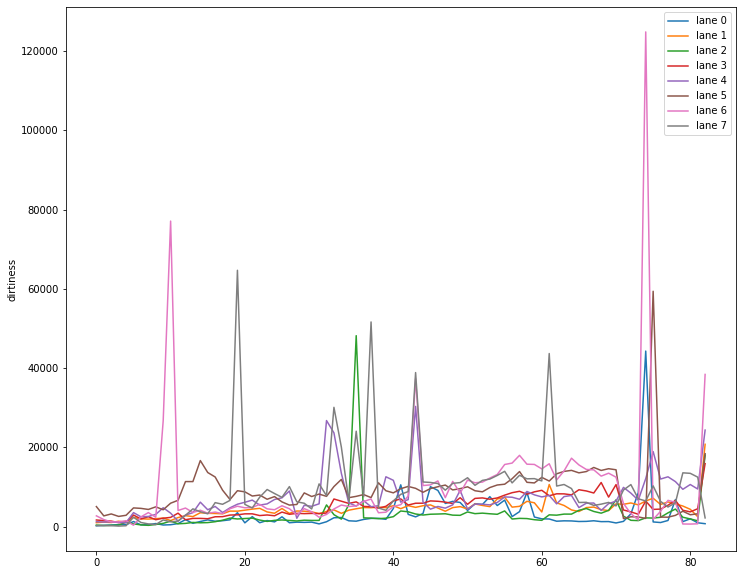

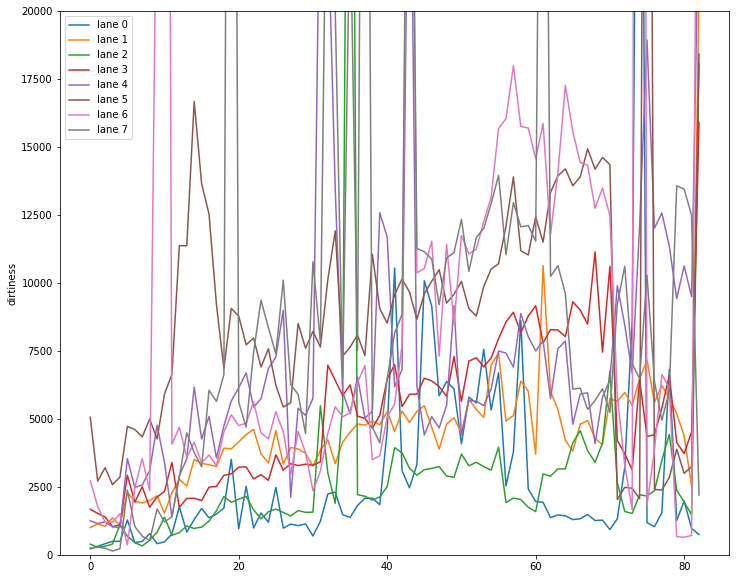

In [15]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12.,10.))
for lane_no, rows in dirtinesses.items():
    if not rows:
        continue
    xs, ys = zip(*rows)
    ts = range(len(xs)) # TODO: Calculate timestamps
    plt.plot(ts, ys, label=f"lane {lane_no}")
plt.ylabel('dirtiness')
# TODO: Add markers for historical events
plt.legend()
plt.show()

# Plot again with y range clipped
plt.figure(figsize=(12.,10.))
for lane_no, rows in dirtinesses.items():
    if not rows:
        continue
    xs, ys = zip(*rows)
    ts = range(len(xs)) # TODO: Calculate timestamps
    plt.plot(ts, ys, label=f"lane {lane_no}")
plt.ylabel('dirtiness')
# TODO: Add markers for historical events
plt.ylim(0., 20000.)
plt.legend()
plt.show()

# Investigating images with high dirtiness values

In [52]:
high_dirtiness_thresh = 20000
fnames_high_dirtiness = []
vals_high_dirtiness = []
for lane_no, rows in dirtinesses.items():
    if not rows:
            continue
    for fname, dirtiness_val in rows:
        if dirtiness_val > high_dirtiness_thresh:
            fnames_high_dirtiness.append(fname)
            vals_high_dirtiness.append(dirtiness_val)
            print('%s\t%d' % (fname, dirtiness_val))

background-20220413-155750-0.tif	44315
background-20220426-114240-1.tif	20786
background-20220218-152118-2.tif	48204
background-20220208-162426-4.tif	26780
background-20220209-120457-4.tif	23672
background-20220301-181652-4.tif	30345
background-20220426-114240-4.tif	24366
background-20220418-152413-5.tif	59410
background-20220114-143015-6.tif	26735
background-20220114-162658-6.tif	77128
background-20220301-181652-6.tif	37326
background-20220413-155750-6.tif	124881
background-20220426-114240-6.tif	38418
background-20220127-141305-7.tif	64708
background-20220209-120457-7.tif	30114
background-20220215-115844-7.tif	20057
background-20220218-152118-7.tif	24079
background-20220222-172341-7.tif	51666
background-20220301-181652-7.tif	38888
background-20220316-141612-7.tif	43694


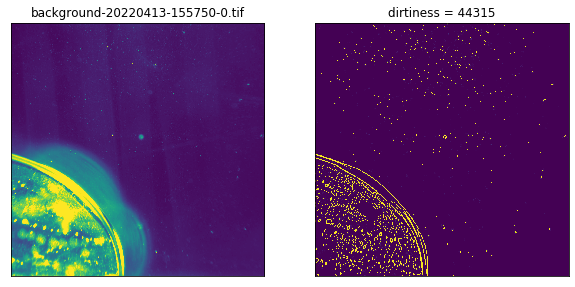

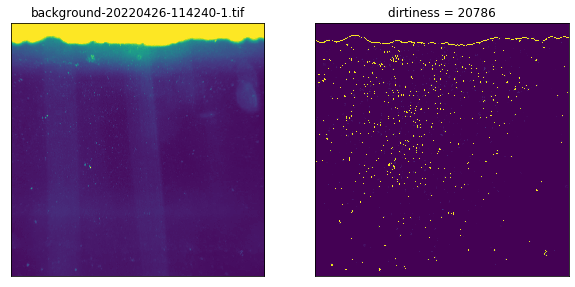

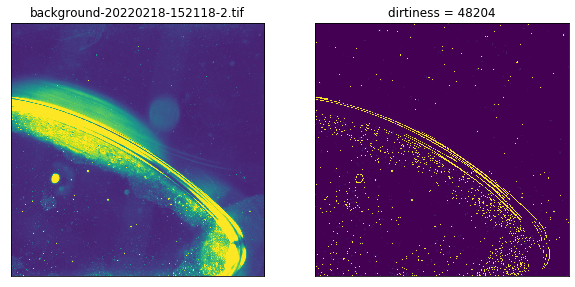

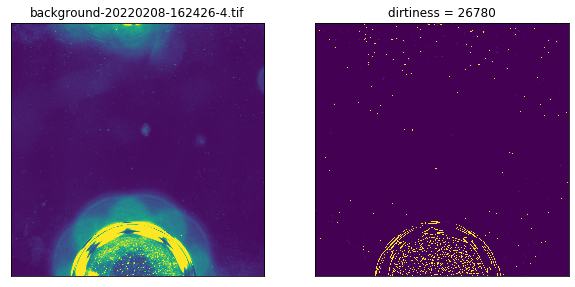

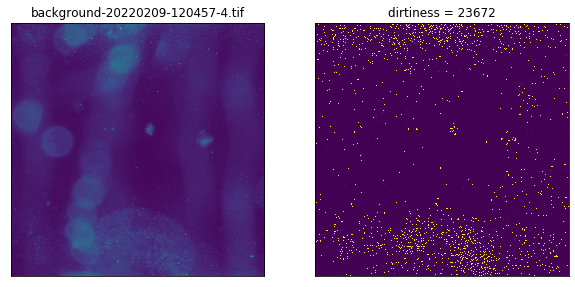

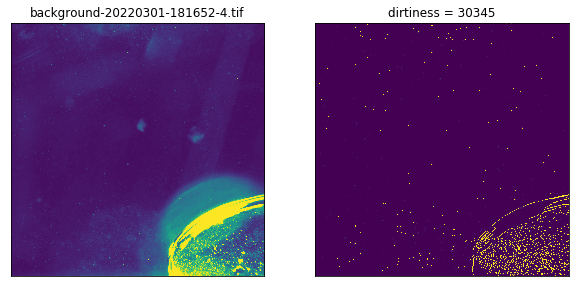

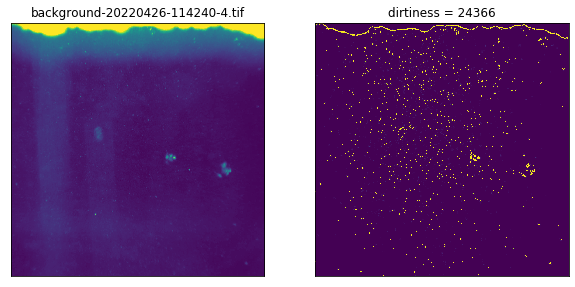

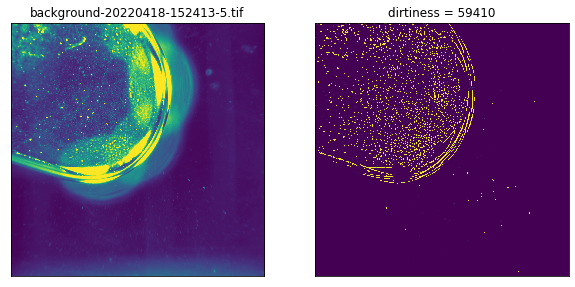

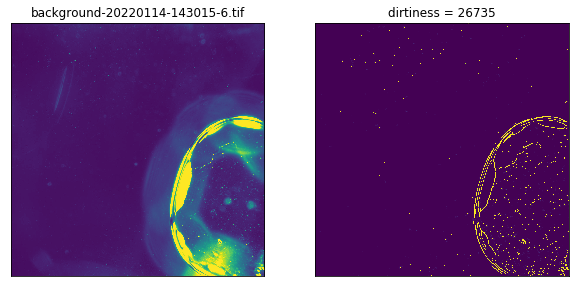

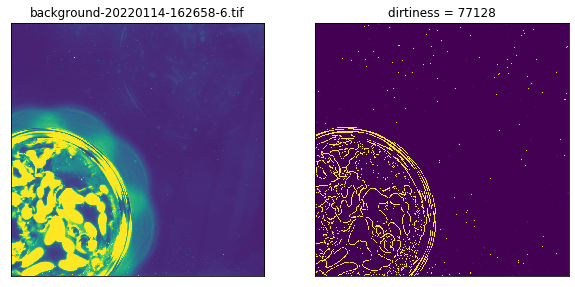

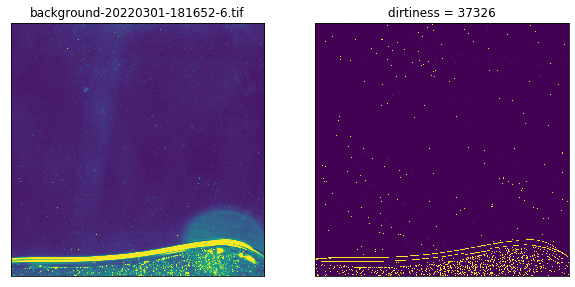

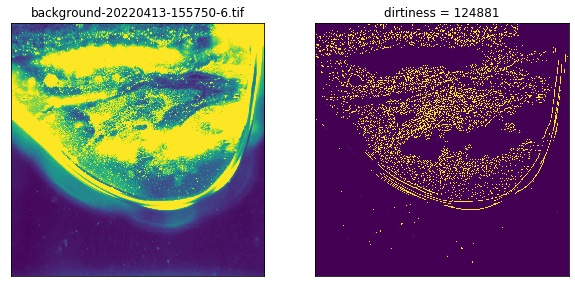

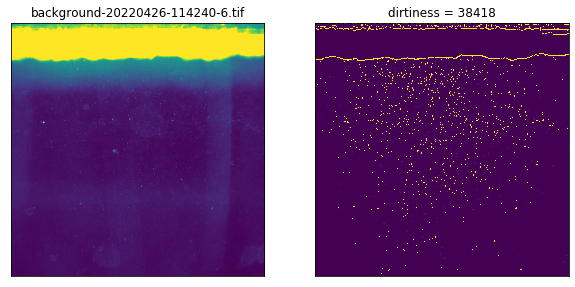

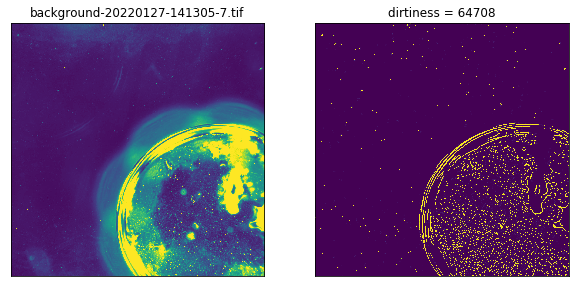

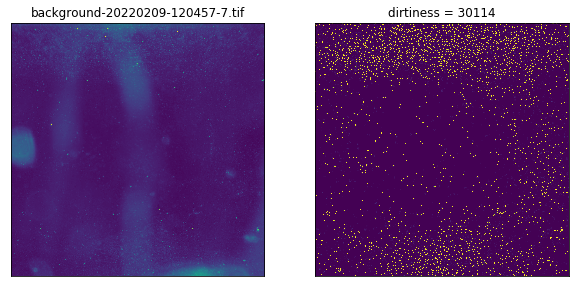

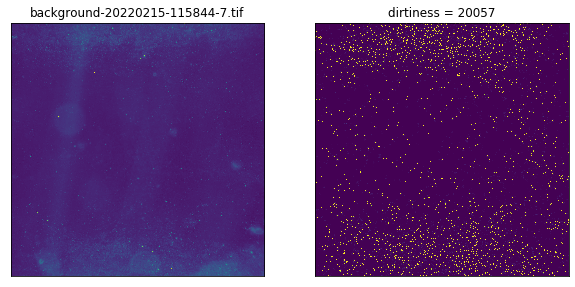

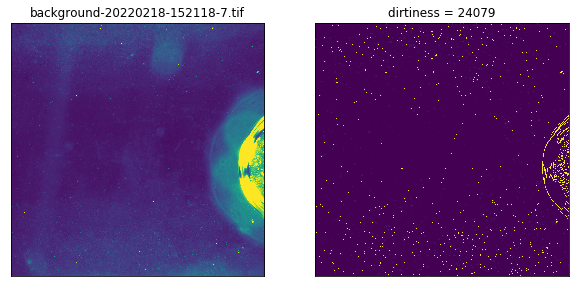

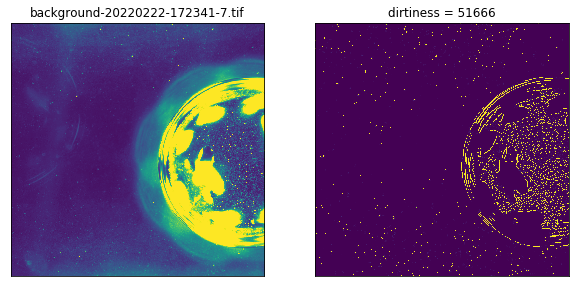

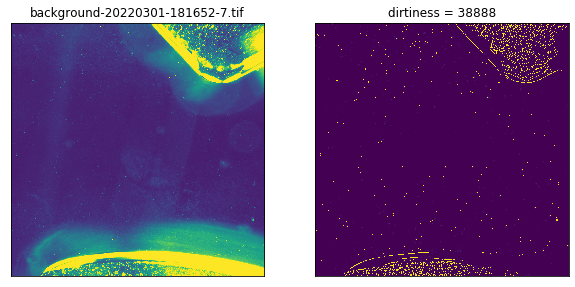

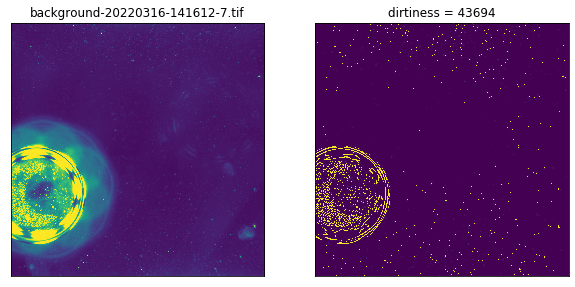

In [55]:
for fname, val in zip(fnames_high_dirtiness, vals_high_dirtiness):
    run_no = fname[11:26]
    path_cropped = base_dir + '/' + run_no + '/' + fname[:-4] + '_cropped.jpg'
    path_processed = base_dir + '/' + run_no + '/' + fname[:-4] + '_processed.jpg'
    im_cropped = imread(path_cropped)
    im_processed = imread(path_processed)
    
    fig, axs = plt.subplots(1,2, figsize=(10,14))
    axs[0].imshow(im_cropped)
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[0].set_title(fname)
    
    axs[1].imshow(im_processed)
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    axs[1].set_title('dirtiness = %d'% val)

    plt.show()

# Investigating images with normal dirtiness values

In [62]:
normal_dirtiness_lo, normal_dirtiness_hi = 5000, 5200 # somewhat arbitrary 'very normal dirtiness' range
fnames_normal_dirtiness = []
vals_normal_dirtiness = []
for lane_no, rows in dirtinesses.items():
    if not rows:
            continue
    for fname, dirtiness_val in rows:
        if dirtiness_val > normal_dirtiness_lo and dirtiness_val < normal_dirtiness_hi:
            fnames_normal_dirtiness.append(fname)
            vals_normal_dirtiness.append(dirtiness_val)
            print('%s\t%d' % (fname, dirtiness_val))

background-20220304-105436-1.tif	5043
background-20220304-164458-1.tif	5048
background-20220311-132047-1.tif	5124
background-20220420-110511-1.tif	5196
background-20220222-145113-3.tif	5104
background-20220222-172341-3.tif	5017
background-20220224-124617-3.tif	5131
background-20220126-185112-4.tif	5092
background-20220204-131050-4.tif	5130
background-20220218-152118-4.tif	5193
background-20220222-172341-4.tif	5035
background-20220302-193248-4.tif	5085
background-20220106-104444-5.tif	5061
background-20220127-141305-6.tif	5152
background-20220216-164808-6.tif	5075
background-20220228-134403-6.tif	5067


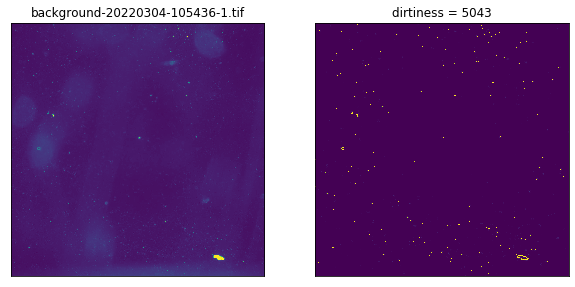

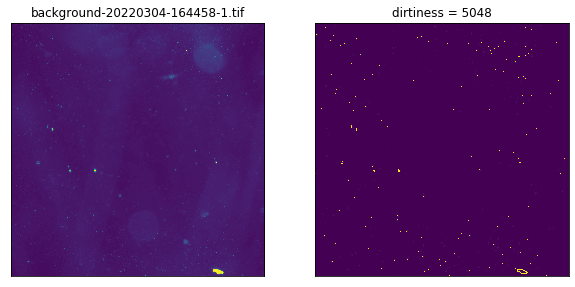

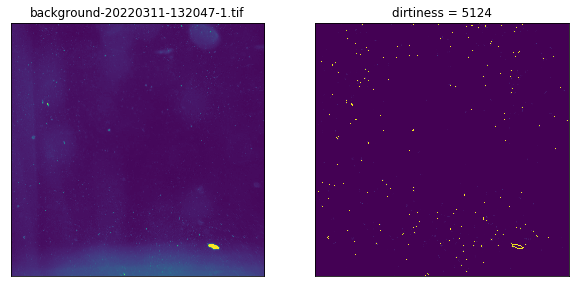

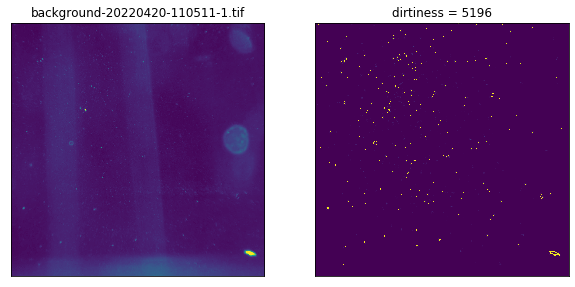

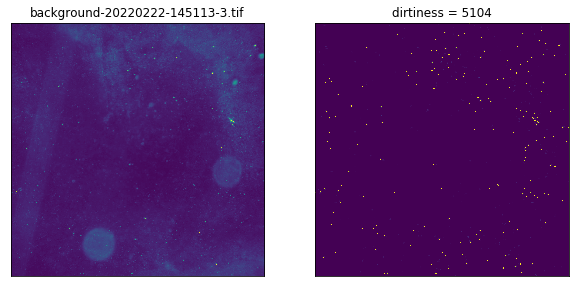

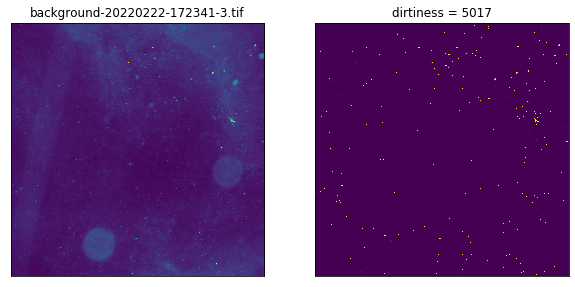

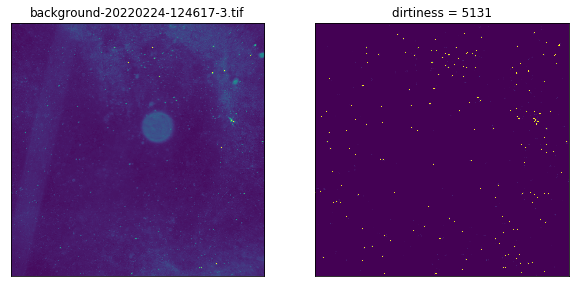

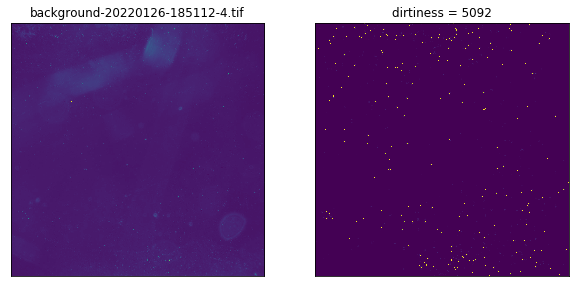

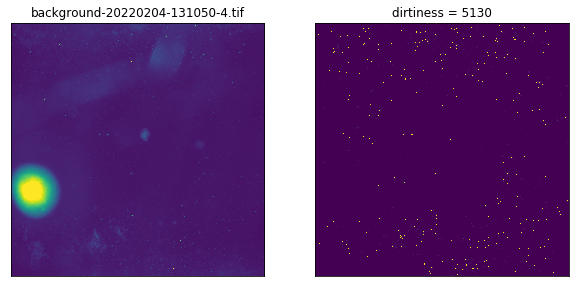

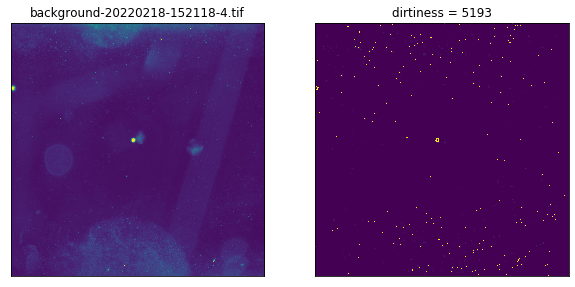

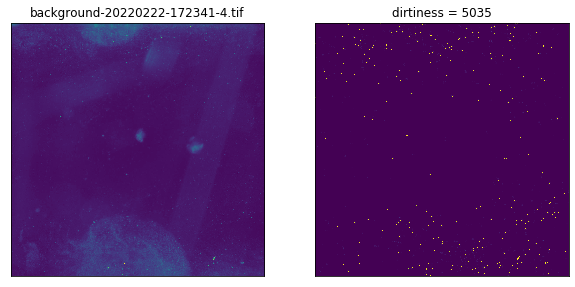

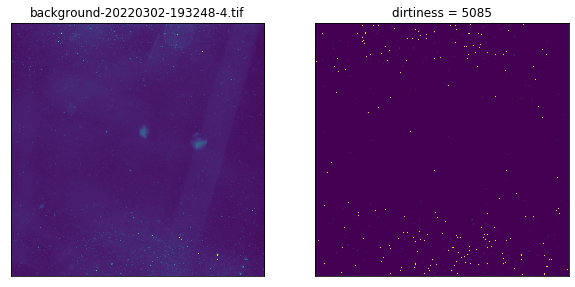

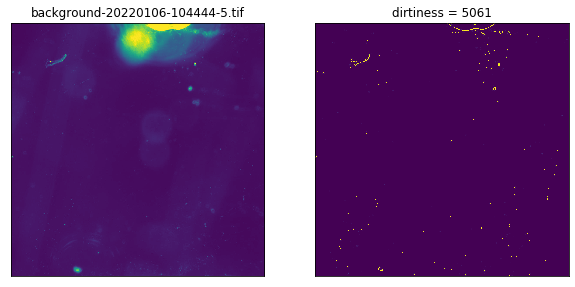

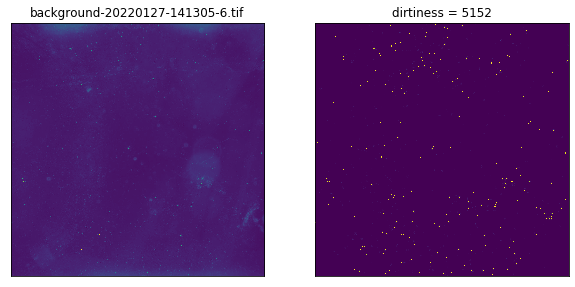

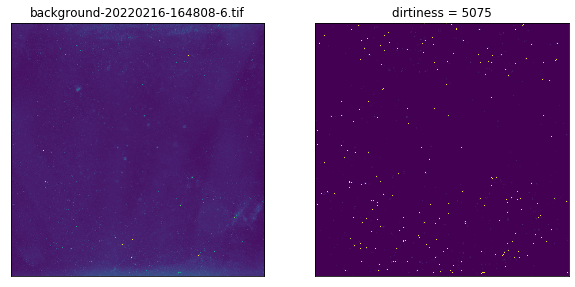

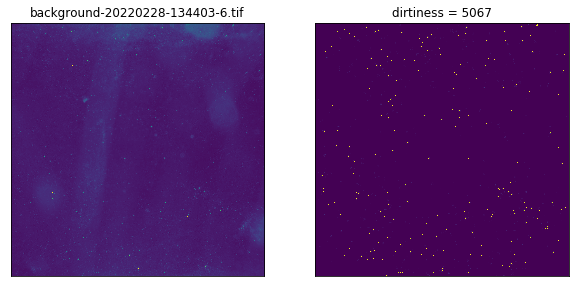

In [63]:
for fname, val in zip(fnames_normal_dirtiness, vals_normal_dirtiness):
    run_no = fname[11:26]
    path_cropped = base_dir + '/' + run_no + '/' + fname[:-4] + '_cropped.jpg'
    path_processed = base_dir + '/' + run_no + '/' + fname[:-4] + '_processed.jpg'
    im_cropped = imread(path_cropped)
    im_processed = imread(path_processed)
    
    fig, axs = plt.subplots(1,2, figsize=(10,14))
    axs[0].imshow(im_cropped)
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[0].set_title(fname)
    
    axs[1].imshow(im_processed)
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    axs[1].set_title('dirtiness = %d'% val)

    plt.show()